<a href="https://colab.research.google.com/github/JonathaCosta/3_SmartGrid/blob/main/AEL/AEL1_AnaliseEnergeticaLocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do potencial energético na cidade de Fortaleza no intervalo de 5 anos e previsão para ano seguinte

**Métodos utilizados**: 
*   Séries Temporais
*   *Machine Learning* 
*   Rede Neural Recorrente



## Etapa 01 - Observações preliminares dos dados

Importar dados, tratar, converter em DataFrame e realizar análise prévia numérica e gráfica.

### Importação, tratamento e conversão


Fonte: https://tempo.inmet.gov.br/TabelaEstacoes/82397#

In [76]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
''' Importa os dados de 2021-2017, atualiza o index para data e altera os nomes das colunas '''
# Datasets
a='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2017_FORTALEZA(A305).csv'
b='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2018_FORTALEZA%20(A305).csv'
c='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2019_FORTALEZA%20(A305).csv'
d='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2020_FORTALEZA%20(A305).csv'
e='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2021_FORTALEZA%20(A305).csv'

dados=pd.DataFrame()
for i in ([a,b,c,d,e]):
  df = pd.read_csv(i, sep=';',header=1,index_col='Data', decimal=',', parse_dates=True,infer_datetime_format=True)
  dados = pd.concat([dados,df])

dados.drop(dados.columns[-1],axis=1,inplace=True)
dados.rename(columns={'Hora (UTC)':'hora', 'Temp. Ins. (C)':'tinst', 'Temp. Max. (C)': 'tmax', 'Temp. Min. (C)':'tmin',
       'Umi. Ins. (%)': 'uinst', 'Umi. Max. (%)':'umax', 'Umi. Min. (%)':'umin',
       'Pto Orvalho Ins. (C)':'poinst', 'Pto Orvalho Max. (C)':'pomax', 'Pto Orvalho Min. (C)':'pomin',
       'Pressao Ins. (hPa)':'pinst', 'Pressao Max. (hPa)':'pmax', 'Pressao Min. (hPa)':'pmin',
       'Vel. Vento (m/s)':'velven', 'Dir. Vento (m/s)':'dirven', 'Raj. Vento (m/s)':'rajven',
       'Radiacao (KJ/m²)':'radiacao', 'Chuva (mm)':'chuva'},inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42312 entries, 2017-01-01 to 2021-10-29
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hora      42312 non-null  int64  
 1   tinst     39602 non-null  float64
 2   tmax      39589 non-null  float64
 3   tmin      39589 non-null  float64
 4   uinst     39602 non-null  float64
 5   umax      39589 non-null  float64
 6   umin      39589 non-null  float64
 7   poinst    39602 non-null  float64
 8   pomax     39589 non-null  float64
 9   pomin     39589 non-null  float64
 10  pinst     39602 non-null  float64
 11  pmax      39589 non-null  float64
 12  pmin      39589 non-null  float64
 13  velven    39601 non-null  float64
 14  dirven    39601 non-null  float64
 15  rajven    39582 non-null  float64
 16  radiacao  23282 non-null  float64
 17  chuva     39602 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 6.1 MB


### Análise prévia dos dados

Medição total de radiação diária, semanal, mensal e anual para o intervalo de 5 anos


In [78]:
dados.tail(10)

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
Data,,,,,,,,,,,,,,,,,,
2021-10-29,1400,32.8,33.3,31.3,43.0,47.0,37.0,18.6,19.3,16.1,1010.1,1011.1,1010.1,3.7,78.0,8.0,2865.45,0.0
2021-10-29,1500,32.3,33.4,31.9,44.0,45.0,41.0,18.4,19.2,17.7,1008.9,1010.1,1008.9,4.3,81.0,8.1,2958.49,0.0
2021-10-29,1600,32.2,33.5,31.9,43.0,45.0,37.0,18.1,18.8,16.1,1007.9,1008.9,1007.9,4.7,83.0,10.4,2771.11,0.0
2021-10-29,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Meses de maior concentração de radiação e chuva nos últimos 5 anos

Text(0.5, 1.0, 'Dispersão de Radiação mensal acumulada em 5 anos')

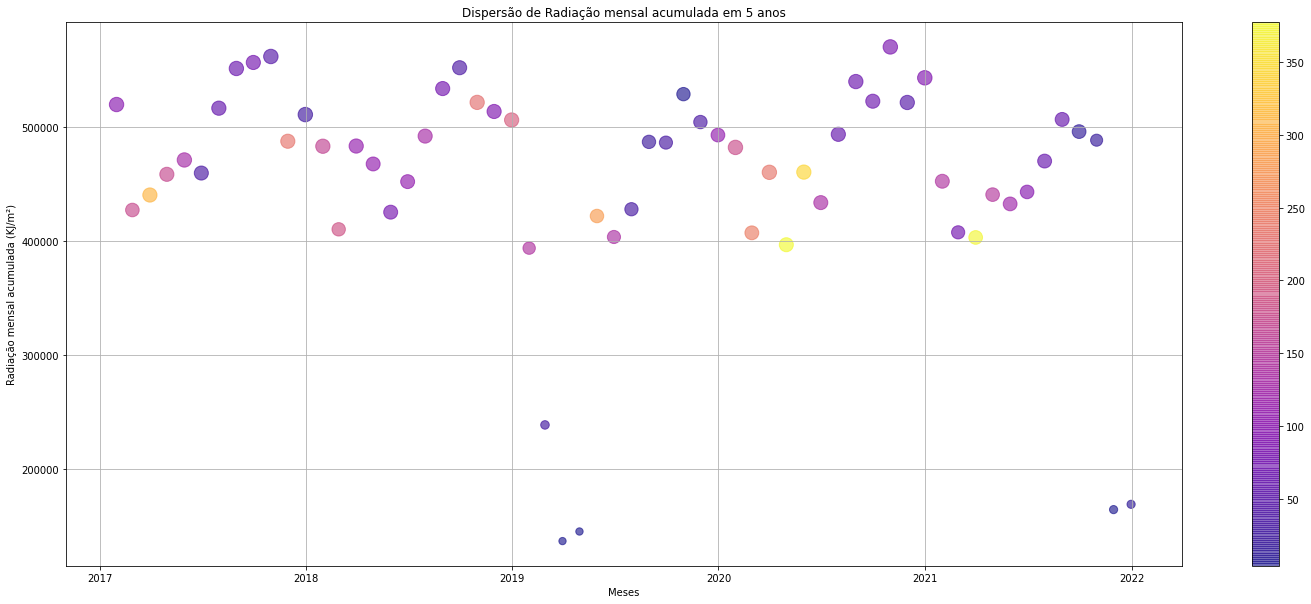

In [79]:
mes_df = dados.resample('M').sum()

plt.figure(figsize=(25,10))
plt.scatter(mes_df.index,mes_df.radiacao, c = mes_df.chuva, cmap='plasma', s = mes_df.tmax/1e2, alpha=0.6 )
plt.colorbar()
plt.grid()
plt.xlabel('Meses')
plt.ylabel('Radiação mensal acumulada (KJ/m²)')
plt.title('Dispersão de Radiação mensal acumulada em 5 anos')

### Meses de concentração de radiação - maior e menor

In [80]:
mes_df.tail()

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
Data,,,,,,,,,,,,,,,,,,
2021-08-31,800400,19111.1,19461.1,18799.3,46844.0,48413.0,45182.0,14297.1,14605.6,13986.6,702685.9,702871.5,702505.4,2112.3,82279.0,5376.3,506546.90,62.0
2021-09-30,772800,18622.6,18953.5,18326.3,45142.0,46533.0,43528.0,14085.4,14351.0,13790.0,673581.9,673758.0,673411.0,2051.9,74749.0,5115.1,495874.52,13.2
2021-10-31,745200,14581.9,14650.6,14090.3,34074.0,34774.0,32253.0,10943.3,11014.0,10533.2,516652.7,508716.0,508450.7,1542.4,56583.0,3691.2,488325.03,17.6
2021-11-30,276000,6597.3,6713.5,6490.3,16915.0,17454.0,16351.0,5151.5,5256.6,5053.8,241192.0,241250.0,241131.9,594.4,27879.0,1514.4,164281.25,4.0
2021-12-31,276000,6574.0,6700.5,6466.2,16967.0,17503.0,16387.0,5145.4,5255.4,5047.1,241256.5,241315.8,241194.9,626.0,29214.0,1591.3,168916.03,14.2


Text(0.5, 1.0, 'Meses de menor concentração de radiação')

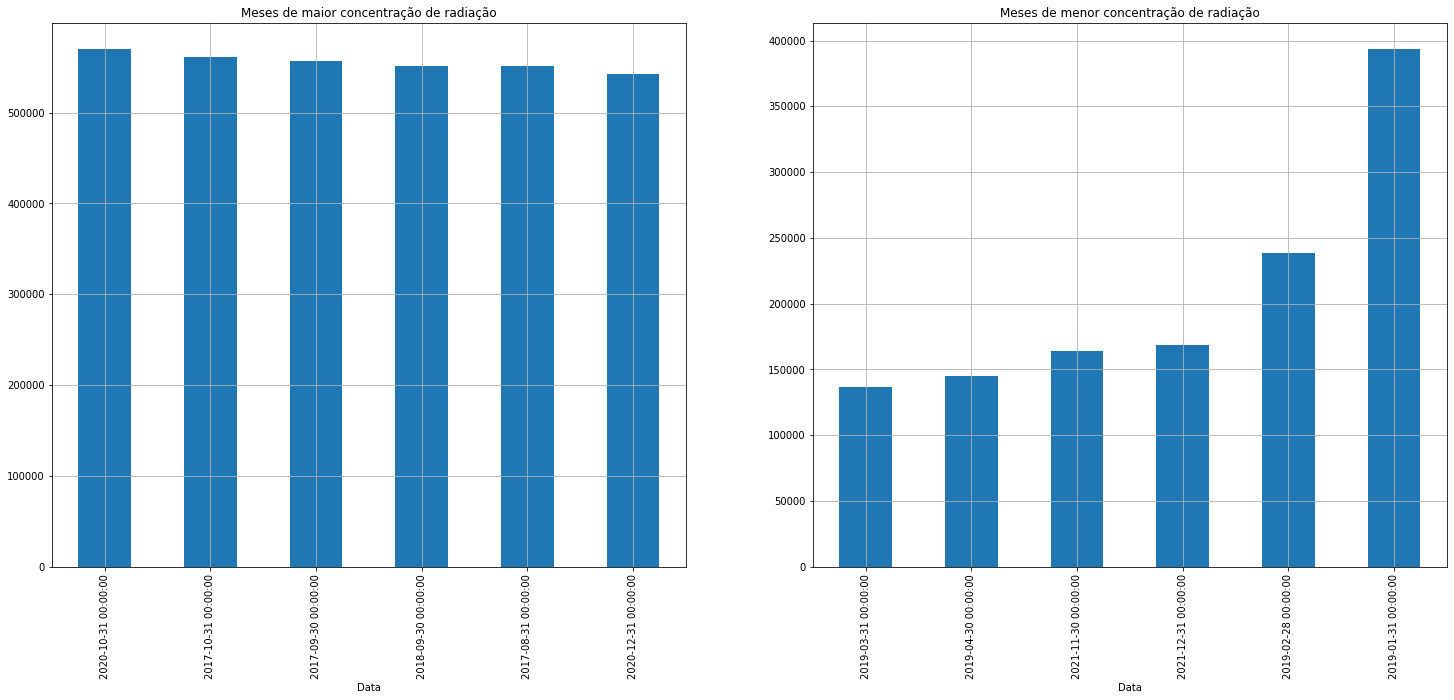

In [81]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
maior = mes_df.radiacao.sort_values(ascending=False).head(6)
maior.plot(kind='bar')
plt.grid()
plt.title('Meses de maior concentração de radiação')

plt.subplot(1,2,2)
menor = mes_df.radiacao.sort_values(ascending=True).head(6)
menor.plot(kind='bar')
plt.grid()
plt.title('Meses de menor concentração de radiação')


### Distribuição das frequências

Text(0, 0.5, 'Radiação acumulada mensal (KJ/m²)')

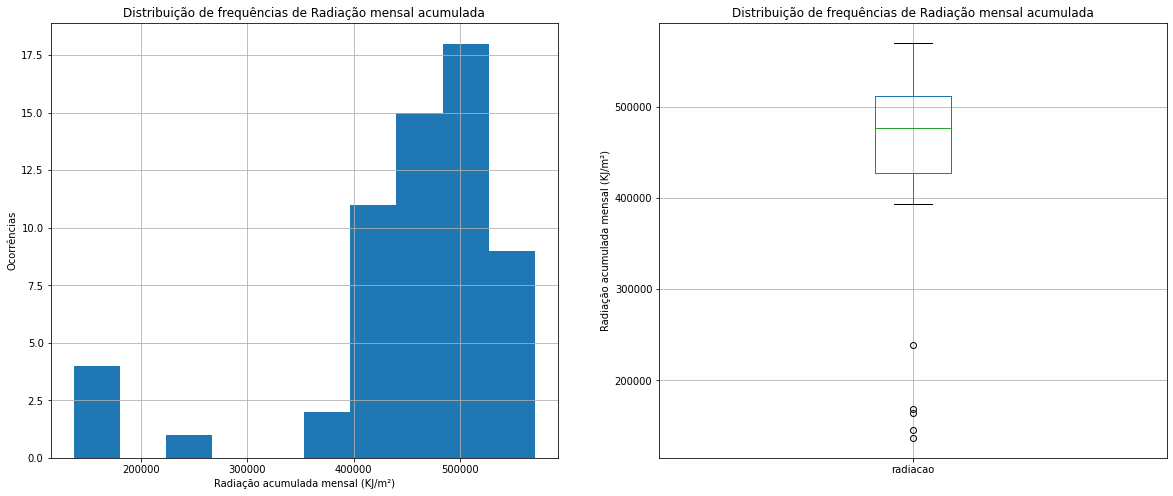

In [82]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
mes_df.radiacao.hist()
plt.title('Distribuição de frequências de Radiação mensal acumulada')
plt.xlabel('Radiação acumulada mensal (KJ/m²)')
plt.ylabel('Ocorrências')

plt.subplot(1,2,2)
mes_df.radiacao.plot(kind='box')
plt.grid()
plt.title('Distribuição de frequências de Radiação mensal acumulada')
plt.ylabel('Radiação acumulada mensal (KJ/m²)')


### Análise gráfica da radiação no quinquênio (2017-2021)

In [86]:
def AnaliseRadiacao(df):
  period = {'D':'diário','W':'semanal','M':'mensal','Y':'anual'}
  plt.figure(figsize=(30,10))

  for i,j in enumerate(period):
    a = df.resample(j).radiacao.sum()/1e3
    plt.subplot(2,2,i+1)
    a.plot()
    plt.ylabel('MJ/m²')
    plt.title('Período '+ period[j])
    plt.grid()
    

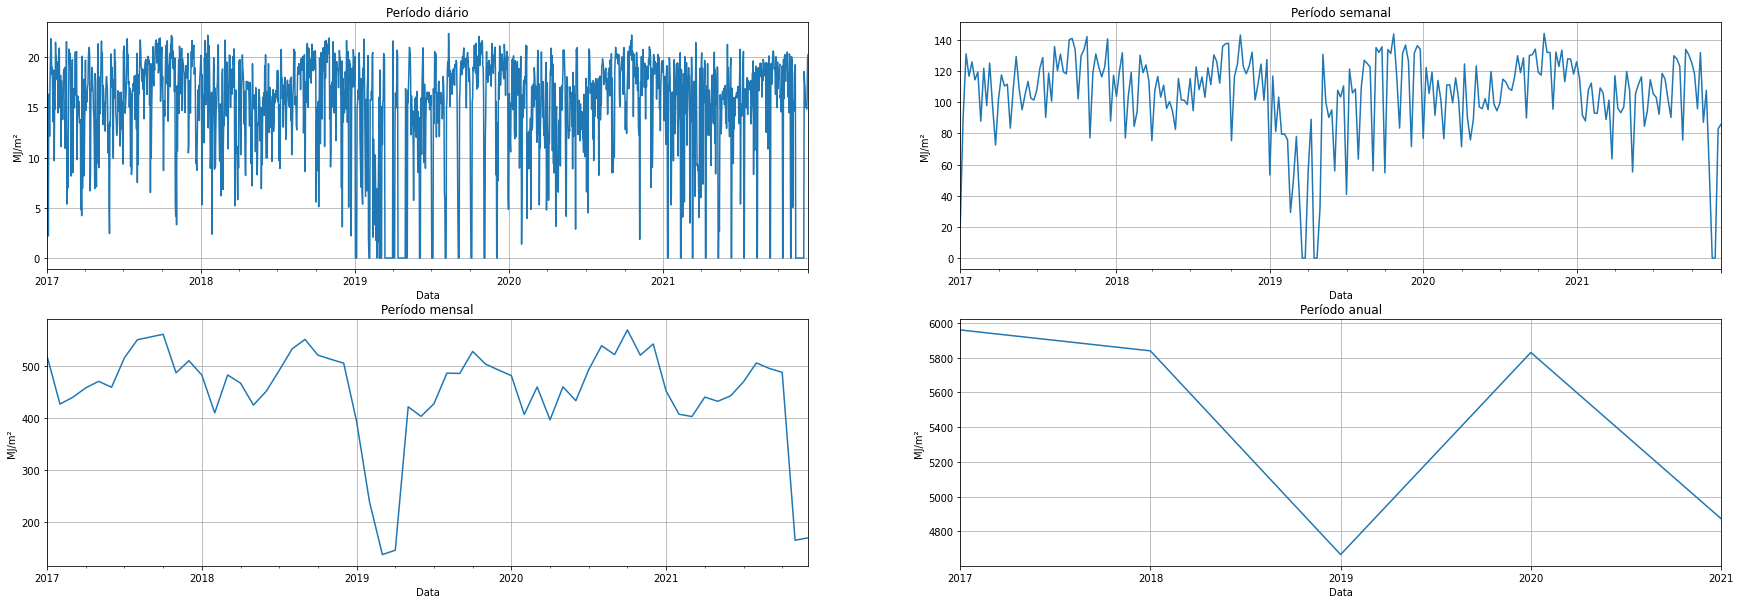

In [85]:
AnaliseRadiacao(dados)